In [25]:
import numpy as np
import h5py
import glob
from PIL import Image
import matplotlib.pyplot as plt


In [26]:
h5_path = 'training/images_four_rotations_75_ratio.h5'
groundtruth_images_path = 'training/groundtruth'
satelite_images_path = 'training/images'
frei_chen_images_path = 'training/edges_train'

In [27]:
def add_to_h5(h5file, name_of_group, group, convertion):
    
    for i in range(len(group)):
        
        img = group[i]
        img = img.convert(convertion)
        
        img = np.array(img)
        
        h5file[name_of_group][i, ...] = img[None]
               
    

In [28]:
from scipy.ndimage import rotate

def append_four_rotation(list_of_images):
    new_images = []
    
    for image in list_of_images:
        for r in range(4):
            rotation = r * 90
            new_images.append(Image.fromarray(rotate(image, rotation)))
            
    return new_images

def append_four_rotation_and_mirror(list_of_images):
    new_images = []
    
    for image in list_of_images:
        for r in range(4):
            rotation = r * 90
            new_images.append(Image.fromarray(rotate(image, rotation)))
            
    return new_images
        

In [29]:
from sklearn.utils import shuffle

np.random.seed(0)

satelite_images = list(map(Image.open, glob.glob(satelite_images_path + '/*.png')))
groundtruth_images =list(map(Image.open, glob.glob(groundtruth_images_path + '/*.png')))

satelite_images, groundtruth_images = shuffle(satelite_images, groundtruth_images)

train_test_ratio = 0.75

train_images = satelite_images[0:int(train_test_ratio*len(satelite_images))]
train_groundtruth = groundtruth_images[0:int(train_test_ratio*len(groundtruth_images))]

# add rotations
train_images = append_four_rotation(train_images)
train_groundtruth = append_four_rotation(train_groundtruth)

test_images = satelite_images[int(train_test_ratio*len(satelite_images)):]
test_groundtruth = groundtruth_images[int(train_test_ratio*len(groundtruth_images)):]

train_shape = (len(train_images), 400, 400, 3)
train_groundtruth_shape = (len(train_images), 400, 400)

test_shape = (len(test_images), 400, 400, 3)
test_groundtruth_shape = (len(test_images), 400, 400)



In [30]:



with h5py.File(h5_path, mode='w') as h5file:
    
    h5file.create_dataset("train", train_shape, np.uint8)
    h5file.create_dataset("train_groundtruth", train_groundtruth_shape, np.uint8)

    h5file.create_dataset("test", test_shape, np.uint8)
    h5file.create_dataset("test_groundtruth", test_groundtruth_shape, np.uint8)
    
    add_to_h5(h5file, 'train', train_images, 'RGB')
    add_to_h5(h5file, 'train_groundtruth', train_groundtruth, 'L')
    add_to_h5(h5file, 'test', test_images, 'RGB')
    add_to_h5(h5file, 'test_groundtruth', test_groundtruth, 'L')


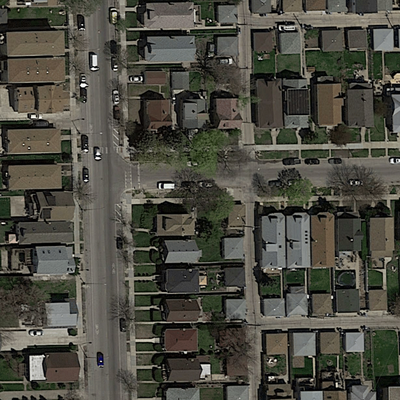

In [41]:
with h5py.File(h5_path, mode='r') as h5file:

    train = h5file['train'][40,...]
    groundtruth = h5file['train_groundtruth'][40,...]


train = train.astype("uint8")
groundtruth = groundtruth.astype("uint8")

train = Image.fromarray(train)
groundtruth = Image.fromarray(groundtruth)

train





In [32]:
# Get percentage of positives compared to negatives

In [33]:

size_positives = 0
size_total = 0
for i in range(len(groundtruth_images)):
    
    img = groundtruth_images[i]
 
    img = img.convert('L')
    img = np.array(img)
    img = img > 10
    
    size_positives = size_positives + img.sum()
    size_total = size_total + img.shape[0]*img.shape[1]
        
size_positives/size_total

0.2093884375